<a href="https://colab.research.google.com/github/MiguelDantasdeOliveira/Trabalho-POO/blob/master/Provaquest%C3%A3o3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd

In [46]:
from google.colab import files
uploaded = files.upload()

Saving weatherAUS.csv to weatherAUS (1).csv


In [47]:
data = pd.read_csv('weatherAUS.csv')
print("Dados carregados com sucesso!")

Dados carregados com sucesso!


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [49]:
data = data[['Rainfall', 'Humidity3pm', 'Pressure9am', 'Temp3pm', 'RainTomorrow']]
data = data.dropna()

In [50]:
le = LabelEncoder()
data['RainTomorrow'] = le.fit_transform(data['RainTomorrow'])

In [51]:
X = data.drop('RainTomorrow', axis=1)
y = data['RainTomorrow']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [55]:
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
nb = GaussianNB()

In [56]:
knn.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)
nb.fit(X_train, y_train)

GaussianNB()

In [57]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

In [58]:
models = {'KNN': knn, 'Random Forest': rf, 'Naive Bayes': nb}

for name, model in models.items():
    print(f"\n🔎 Avaliação do modelo: {name}")


🔎 Avaliação do modelo: KNN

🔎 Avaliação do modelo: Random Forest

🔎 Avaliação do modelo: Naive Bayes


In [59]:
if name == 'KNN':
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
else:
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

In [60]:
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Matriz de Confusão:
[[18657   756]
 [ 3534  1991]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90     19413
           1       0.72      0.36      0.48      5525

    accuracy                           0.83     24938
   macro avg       0.78      0.66      0.69     24938
weighted avg       0.82      0.83      0.80     24938



In [61]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

<Figure size 640x480 with 0 Axes>

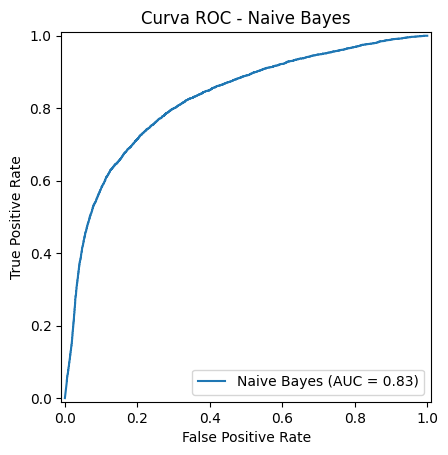

In [62]:
plt.figure()
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name).plot()
plt.title(f'Curva ROC - {name}')
plt.show()